In [1]:
from lightjob.db import SUCCESS, RUNNING, Dataset
import pandas as pd

from scipy.stats import skew
import os

import numpy as np
from collections import defaultdict
from bokeh.models import HoverTool, BoxSelectTool

from bokeh.charts import Scatter, show, Histogram, Bar
from bokeh.charts import color, marker

from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show, ColumnDataSource

DB = Dataset
output_notebook()

Loading BokehJS ...

In [2]:
filename = '../.lightjob/'

In [3]:
db = DB()
db.load(filename)

default_stats_list = [
    u'intdim_mle',
    u'skew',
    u'clusdiversity',
    u'multiplecorrelation',
    u'var',
    u'mean',
    u'convergence_speed',
    
    'contractive_coef'
]

def extract_data(where, stats_list=default_stats_list):
    stats = defaultdict(list)
    for j in db.jobs_with(state=SUCCESS, type='generation'):
        content = j['content']
        s = content['model_summary']
        jref = db.get_job_by_summary(s)
        if jref['where'] != where:
            continue
        if "stats" not in j:
            continue
        d = j['stats']
        if d is None:
            continue
        for k in stats_list:
            if k in d:
                stats[k].append(d[k])
            elif k in jref['content']:
                stats[k].append(jref['content'][k])
            elif k in jref['content']['model_params']:
                stats[k].append(jref['content']['model_params'][k])

        stats['id'].append(s)
    return stats

# Varying Contraction (jobset5)

In [ ]:
stats = extract_data('jobset5')
stats = pd.DataFrame(stats)

In [ ]:
stat_name = 'contractive_coef'

In [ ]:
fig = Scatter(x=stat_name, y='mean', data=stats)
show(fig)

In [ ]:
fig = Scatter(x=stat_name, y='var', data=stats)
show(fig)

In [ ]:
fig = Scatter(x=stat_name, y='skew', data=stats)
show(fig)

In [ ]:
fig = Histogram(stats, stat_name)
show(fig)

In [ ]:
fig = Scatter(x=stat_name, y='multiplecorrelation', data=stats)
show(fig)

In [ ]:
fig = Scatter(x=stat_name, y='clusdiversity', data=stats)
show(fig)

In [ ]:
fig = Scatter(x=stat_name, y='intdim_mle', data=stats)
show(fig)

In [ ]:
stats['log_convergence_speed'] = stats['convergence_speed']
hover = HoverTool()
hover.tooltips = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("id", "@id"),
]

p = figure( tools=[BoxSelectTool(), hover])
p.circle(x=stat_name, y='convergence_speed', source=ColumnDataSource(stats))
#fig = Scatter(x=stat_name, y='convergence_speed', data=ColumnDataSource(stats), tools=[BoxSelectTool(), hover])
#show(fig)
p.xaxis.axis_label = stat_name
p.yaxis.axis_label = 'convergence_speed'
show(p)

# Walkback (jobset17)

In [ ]:
stats = extract_data('jobset17', stats_list=default_stats_list+['denoise'])
stats = pd.DataFrame(stats)
print(stats.columns)

In [ ]:
fig = Scatter(x='denoise', y='intdim_mle', data=stats)
show(fig)

## nb of layers and nb of units (jobset19)

### jobset19 =   Exploring params of denoising with hidden layers and nb of hidden units

In [ ]:
stats = extract_data('jobset19', stats_list=default_stats_list+['nb_hidden_units', 'nb_layers'])
stats = pd.DataFrame(stats)
print(stats.columns)

In [ ]:
fig = Scatter(x='nb_layers', 
              y='clusdiversity', 
              data=stats, 
              legend='top_right')
show(fig)

## nb of units and denoise (jobset20) 

In [30]:
stats = extract_data('jobset20', default_stats_list + ['nb_hidden_units', 'denoise'])
stats = pd.DataFrame(stats)

In [31]:
denoise_vals = list(set(stats['denoise']))
s = (stats['denoise'] == denoise_vals[2])
fig = Scatter(x='nb_hidden_units', 
              y='clusdiversity', 
              data=stats[s])
show(fig)

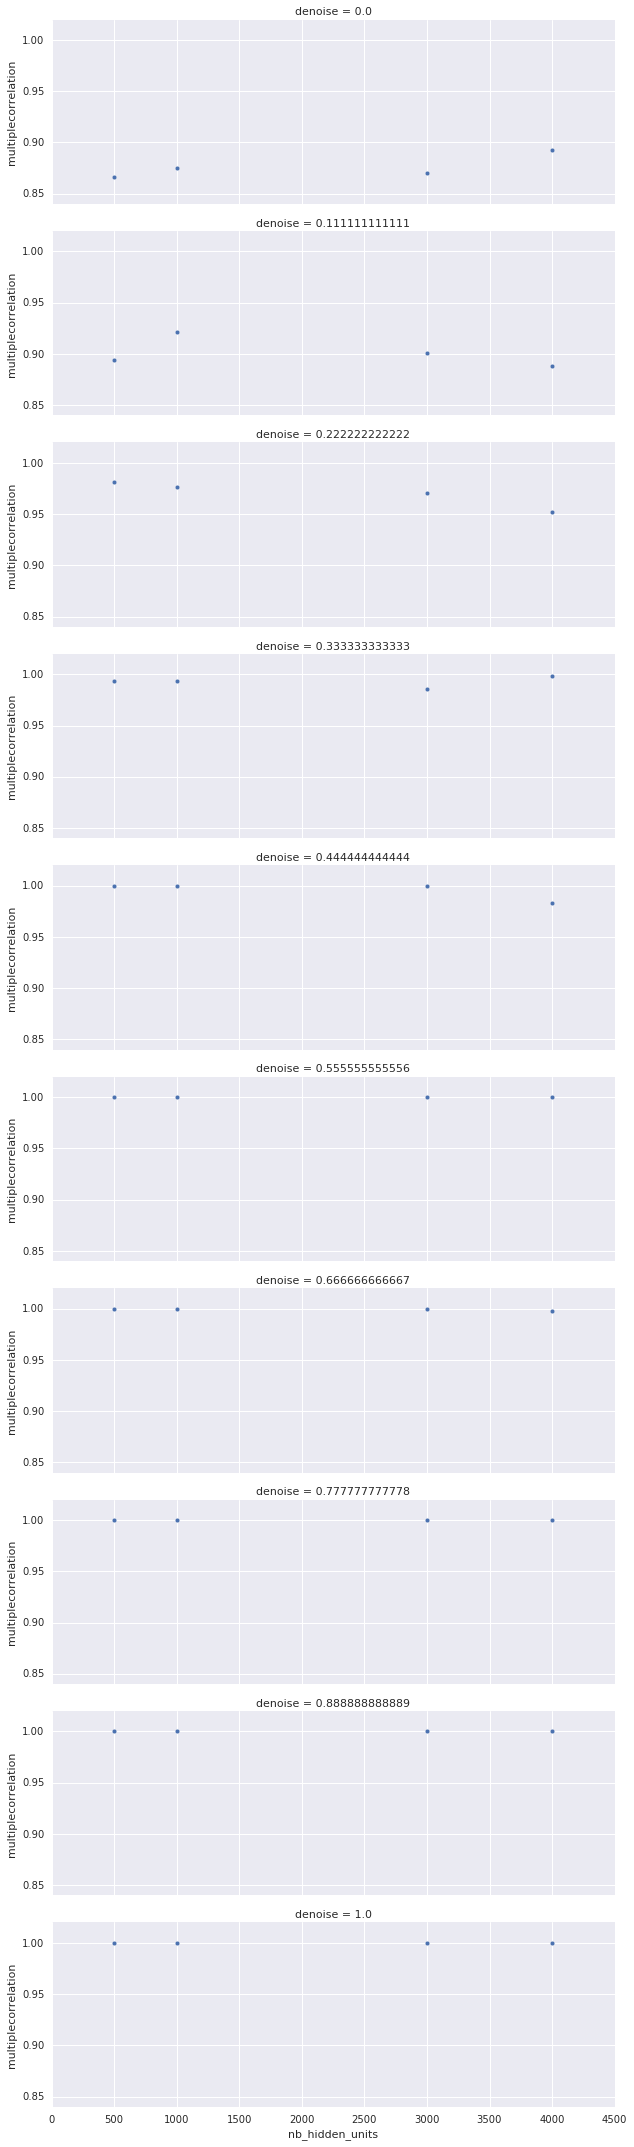

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh import mpl
sns.set(style="darkgrid")
g = sns.FacetGrid(stats, row="denoise", aspect=3)
g = (g.map(plt.scatter, "nb_hidden_units", "multiplecorrelation", edgecolor="w"))
plt.show()

## jobset21 ( Exploring nb of filters around the best conv archi found in jobset1 (checkeed visually))

In [ ]:
stats = extract_data('jobset21', default_stats_list + ['nb_layers'])
stats = pd.DataFrame(stats)

In [ ]:
fig = Scatter(x='nb_layers', 
              y='clusdiversity', 
              data=stats)
show(fig)

## jobset22 (   like jobset20 but with limitation in nb of epochs to obtain exact same result of the 'good' contraction coef case)

In [ ]:
stats = extract_data('jobset22', default_stats_list + ['nb_hidden_units'])
stats = pd.DataFrame(stats)

In [ ]:
print(stats.keys())

In [ ]:
fig = Scatter(x='nb_hidden_units', 
              y='clusdiversity', 
              data=stats)
show(fig)